<a href="https://colab.research.google.com/github/harshnarang8/sc779-comp/blob/main/phase1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

File for loading the code from github and syncing.

In [ ]:
from google.colab import drive
from os.path import join

ROOT = '/content/drive'
PROJ = 'My Drive/'


In [ ]:
# code to read the hinglish file
import pandas as pd

In [ ]:
import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
import random

In [ ]:
device

device(type='cuda')

In [ ]:
drive.mount(ROOT)

Mounted at /content/drive


In [ ]:
%cd 'Colab Notebooks'

/content/drive/MyDrive/Colab Notebooks


In [ ]:
train_file = pd.read_csv('AssignmentNLP/train/train.csv', index_col=0)

In [ ]:
train_file.iloc[0, 0]


'एल सालवाडोर मे, जिन दोनो पक्षों ने सिविल-युद्ध से वापसी ली, उन्होंने वही काम किये जो कैदियों की कश्मकश के निदान हैं।'

In [ ]:
# write a preprocessor, use a simple lstm, and get a bleu score result on training
# let's just use word segmentation and pass it through an lstm for a basic mts.
# need to use indic nlp lib, lets clone it here

In [ ]:
!git clone "https://github.com/anoopkunchukuttan/indic_nlp_library"

Cloning into 'indic_nlp_library'...
remote: Enumerating objects: 93, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 1271 (delta 50), reused 54 (delta 25), pack-reused 1178
Receiving objects: 100% (1271/1271), 9.56 MiB | 8.33 MiB/s, done.
Resolving deltas: 100% (654/654), done.


In [ ]:
!git clone https://github.com/anoopkunchukuttan/indic_nlp_resources.git

Cloning into 'indic_nlp_resources'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 133 (delta 0), reused 2 (delta 0), pack-reused 126
Receiving objects: 100% (133/133), 149.77 MiB | 18.83 MiB/s, done.
Resolving deltas: 100% (51/51), done.
Checking out files: 100% (28/28), done.


In [ ]:
!pip install Morfessor

In [ ]:
INDIC_NLP_LIB_HOME="indic_nlp_library"
INDIC_NLP_RESOURCES="indic_nlp_resources"

In [ ]:
import sys
sys.path.append(r'{}'.format(INDIC_NLP_LIB_HOME))

In [ ]:
from indicnlp import common
common.set_resources_path(INDIC_NLP_RESOURCES)

In [ ]:
from indicnlp import loader
loader.load()

In [ ]:
from indicnlp.normalize.indic_normalize import BaseNormalizer
from indicnlp.tokenize import indic_tokenize, indic_detokenize

In [ ]:
input_text = train_file.iloc[0,0]
print(input_text)

remove_nuktas=False
normalizer = BaseNormalizer("hi", remove_nuktas=False)
output_text=normalizer.normalize(input_text)
output_tokens = indic_tokenize.trivial_tokenize(input_text)
output_tokens_2 = indic_detokenize.trivial_detokenize(input_text, lang="hi")

print(output_text)
print(output_tokens)
print(output_tokens_2)

print('Before normalization')
print(' '.join([ hex(ord(c)) for c in input_text ] ))
print('Length: {}'.format(len(input_text)))
print()    
print('After normalization')
print(' '.join([ hex(ord(c)) for c in output_text ] ))
print('Length: {}'.format(len(output_text)))    

एल सालवाडोर मे, जिन दोनो पक्षों ने सिविल-युद्ध से वापसी ली, उन्होंने वही काम किये जो कैदियों की कश्मकश के निदान हैं।
एल सालवाडोर मे, जिन दोनो पक्षों ने सिविल-युद्ध से वापसी ली, उन्होंने वही काम किये जो कैदियों की कश्मकश के निदान हैं।
['एल', 'सालवाडोर', 'मे', ',', 'जिन', 'दोनो', 'पक्षों', 'ने', 'सिविल', '-', 'युद्ध', 'से', 'वापसी', 'ली', ',', 'उन्होंने', 'वही', 'काम', 'किये', 'जो', 'कैदियों', 'की', 'कश्मकश', 'के', 'निदान', 'हैं', '।']
एल सालवाडोर मे, जिन दोनो पक्षों ने सिविल-युद्ध से वापसी ली, उन्होंने वही काम किये जो कैदियों की कश्मकश के निदान हैं।
Before normalization
0x90f 0x932 0x20 0x938 0x93e 0x932 0x935 0x93e 0x921 0x94b 0x930 0x20 0x92e 0x947 0x2c 0x20 0x91c 0x93f 0x928 0x20 0x926 0x94b 0x928 0x94b 0x20 0x92a 0x915 0x94d 0x937 0x94b 0x902 0x20 0x928 0x947 0x20 0x938 0x93f 0x935 0x93f 0x932 0x2d 0x92f 0x941 0x926 0x94d 0x927 0x20 0x938 0x947 0x20 0x935 0x93e 0x92a 0x938 0x940 0x20 0x932 0x940 0x2c 0x20 0x909 0x928 0x94d 0x939 0x94b 0x902 0x928 0x947 0x20 0x935 0x939 0x940 0x20 0x

In [ ]:
# class for building vocabulary, taken from the pytorch tutorial: https://pytorch.org/tutorials/intermediate/seq2seq_translation_tutorial.html
SOS_token = 0
EOS_token = 1
MAX_LENGTH = 300

class lang:
  def __init__(self, name):
    self.name = name
    self.word2idx = {}
    self.word2count = {}
    self.idx2word = {0: "SOS", 1: "EOS"}
    self.n_words = 2
  
  def addSent(self, sentence):
    for word in indic_tokenize.trivial_tokenize(sentence):
      self.addWord(word)
  
  def addWord(self, word):
    if word not in self.word2idx:
      self.word2idx[word] = self.n_words
      self.word2count[word] = 1
      self.idx2word[self.n_words] = word
      self.n_words += 1
    else:
      self.word2count[word] += 1

In [ ]:
def init_dataset(input_data):
  pairs = []
  hindi = lang('hi')
  eng = lang('eng')
  for i in range(len(input_data)):
    hindi.addSent(input_data.iloc[i,0])
    eng.addSent(input_data.iloc[i,1])
    pairs.append((input_data.iloc[i,0], input_data.iloc[i, 1]))
  print('Number of words:')
  print("Hindi: " + str(hindi.n_words))
  print("English: "+str(eng.n_words))
  # init_dataset at this point has the pairs of sentences in a list
  # we'd like to compute the vocabulary too, so let's see
  return (pairs, hindi, eng)

In [ ]:
sent_pairs, hindi, eng = init_dataset(train_file)

Number of words:
Hindi: 46382
English: 37706


In [ ]:
train_sent_pairs = sent_pairs[:80000]
val_sent_pairs = sent_pairs[80000:]

Now we have loaded the vocabularies and sent_pairs, we probably need to append the sos and eos tokens before actually using the pairs, lets figure out as we go.

In [ ]:
# for this version a simple encoder decoder framework, code is mostly retyped from the tutorial in the link already mentioned above
class encoderRNN(nn.Module):
  def __init__(self, input_size, hidden_size):
    super(encoderRNN, self).__init__()
    self.hidden_size = hidden_size

    self.embedding = nn.Embedding(input_size, hidden_size)
    self.gru = nn.GRU(hidden_size, hidden_size)
  
  def forward(self, input, hidden):
    embedded = self.embedding(input).view(1, 1, -1)
    output = embedded
    output, hidden = self.gru(output, hidden)
    return output, hidden
  
  def initHidden(self):
    return torch.zeros(1, 1, self.hidden_size, device=device)

In [ ]:
class decoderRNN(nn.Module):
  def __init__(self, hidden_size, output_size):
    super(decoderRNN, self).__init__()
    self.hidden_size = hidden_size

    self.embedding = nn.Embedding(output_size, hidden_size)
    self.gru = nn.GRU(hidden_size, hidden_size)
    self.out = nn.Linear(hidden_size, output_size)
    self.softmax = nn.LogSoftmax(dim=1)

  def forward(self, input, hidden):
    output = self.embedding(input).view(1, 1, -1)
    output = F.relu(output)
    output, hidden = self.gru(output, hidden)
    output = self.softmax(self.out(output[0]))
    return output, hidden
  
  def initHidden(self):
    return torch.zeros(1, 1, self.hidden_size, device=device)

Okay, we've written 2 things at this point, a language class which has a dictionary of words, and an encoder decoder model.
Now, we need to create vectors for the sentences, write a few lines of code for the training routine.

Let's do this before 1 am, 10:48 pm right now.

Update: 2 am still no shit lol

In [ ]:
# replace inp and output lang 
input_lang = hindi
output_lang = eng

def indexesFromSentence(lang, sentence):
  idxs = []
  for word in indic_tokenize.trivial_tokenize(sentence):
    if word in lang.word2idx:
      idxs.append(lang.word2idx[word])
  return idxs

def tensorFromSentence(lang, sentence):
  indexes = indexesFromSentence(lang, sentence)
  indexes.append(EOS_token)
  return torch.tensor(indexes, dtype=torch.long, device=device).view(-1, 1)

def tensorsFromPair(pair):
  input_tensor = tensorFromSentence(input_lang, pair[0])
  output_tensor = tensorFromSentence(output_lang, pair[1])
  return (input_tensor, output_tensor)

In [ ]:
teacher_forcing_ratio = 0.5

def train(input_tensor, target_tensor, encoder, decoder, encoder_optimizer, decoder_optimizer, criterion, max_length=MAX_LENGTH):
  encoder_hidden = encoder.initHidden()
  
  encoder_optimizer.zero_grad()
  decoder_optimizer.zero_grad()

  input_length = input_tensor.size(0)
  target_length = target_tensor.size(0)

  encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)

  loss = 0

  for ei in range(input_length):
    encoder_output, encoder_hidden = encoder(input_tensor[ei], encoder_hidden)
    encoder_outputs[ei] = encoder_output[0, 0]

  decoder_input = torch.tensor([[SOS_token]], device=device)

  decoder_hidden = encoder_hidden

  use_teacher_forcing = True if random.random() < teacher_forcing_ratio else False

  if use_teacher_forcing:
    for di in range(target_length):
      decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)
      loss += criterion(decoder_output, target_tensor[di])
      decoder_input = target_tensor[di] # teacher forcing, since we feed target tensor to decoder
  
  else:
    for di in range(target_length):
      decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)
      loss += criterion(decoder_output, target_tensor[di])
      topv, topi = decoder_output.topk(1)
      decoder_input = topi.squeeze().detach()

      loss += criterion(decoder_output, target_tensor[di])

      if decoder_input.item() == EOS_token:
        break
  
  loss.backward()

  encoder_optimizer.step()
  decoder_optimizer.step()

  return loss.item()/target_length


In [ ]:
import time
import math


def asMinutes(s):
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)


def timeSince(since, percent):
    now = time.time()
    s = now - since
    es = s / (percent)
    rs = es - s
    return '%s (- %s)' % (asMinutes(s), asMinutes(rs))

In [ ]:
def trainIters(encoder, decoder, n_iters, print_every=1000, plot_every=100, learning_rate=0.01):
    start = time.time()
    plot_losses = []
    print_loss_total = 0  # Reset every print_every
    plot_loss_total = 0  # Reset every plot_every

    encoder_optimizer = optim.SGD(encoder.parameters(), lr=learning_rate)
    decoder_optimizer = optim.SGD(decoder.parameters(), lr=learning_rate)
    training_pairs = [tensorsFromPair(random.choice(train_sent_pairs))
                      for i in range(n_iters)]
    criterion = nn.NLLLoss()

    for iter in range(1, n_iters + 1):
        training_pair = training_pairs[iter - 1]
        input_tensor = training_pair[0]
        target_tensor = training_pair[1]

        loss = train(input_tensor, target_tensor, encoder,
                     decoder, encoder_optimizer, decoder_optimizer, criterion)
        print_loss_total += loss
        plot_loss_total += loss

        if iter % print_every == 0:
            print_loss_avg = print_loss_total / print_every
            print_loss_total = 0
            print('%s (%d %d%%) %.4f' % (timeSince(start, iter / n_iters),
                                         iter, iter / n_iters * 100, print_loss_avg))

        if iter % plot_every == 0:
            plot_loss_avg = plot_loss_total / plot_every
            plot_losses.append(plot_loss_avg)
            plot_loss_total = 0

    showPlot(plot_losses)

In [ ]:
import matplotlib.pyplot as plt
plt.switch_backend('agg')
import matplotlib.ticker as ticker
import numpy as np


def showPlot(points):
    plt.figure()
    fig, ax = plt.subplots()
    # this locator puts ticks at regular intervals
    loc = ticker.MultipleLocator(base=0.2)
    ax.yaxis.set_major_locator(loc)
    plt.plot(points)

In [ ]:
def evaluate(encoder, decoder, sentence, max_length=MAX_LENGTH):
    with torch.no_grad():
        input_tensor = tensorFromSentence(input_lang, sentence)
        input_length = input_tensor.size()[0]
        encoder_hidden = encoder.initHidden()

        encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)

        for ei in range(input_length):
            encoder_output, encoder_hidden = encoder(input_tensor[ei],
                                                     encoder_hidden)
            encoder_outputs[ei] += encoder_output[0, 0]

        decoder_input = torch.tensor([[SOS_token]], device=device)  # SOS

        decoder_hidden = encoder_hidden

        decoded_words = []

        for di in range(max_length):
            decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)
            topv, topi = decoder_output.data.topk(1)
            if topi.item() == EOS_token:
                decoded_words.append('<EOS>')
                break
            else:
                decoded_words.append(output_lang.idx2word[topi.item()])

            decoder_input = topi.squeeze().detach()

        return decoded_words

In [ ]:
def evaluateRandomly(encoder, decoder, n=10):
    for i in range(n):
        pair = random.choice(val_sent_pairs)
        print('>', pair[0])
        print('=', pair[1])
        output_words = evaluate(encoder, decoder, pair[0])
        output_sentence = ' '.join(output_words)
        print('<', output_sentence)
        print('')

In [ ]:
hidden_size = 256
encoder1 = encoderRNN(input_lang.n_words, hidden_size).to(device)
decoder1 = decoderRNN(hidden_size, output_lang.n_words).to(device)

trainIters(encoder1, decoder1, 100000, print_every=500)

0m 30s (- 100m 19s) (500 0%) 7.9384
0m 48s (- 80m 2s) (1000 1%) 7.1847
1m 7s (- 73m 37s) (1500 1%) 7.2538
1m 25s (- 70m 11s) (2000 2%) 6.8070
1m 45s (- 68m 31s) (2500 2%) 6.7720
2m 3s (- 66m 38s) (3000 3%) 6.7627
2m 23s (- 65m 49s) (3500 3%) 7.0020
2m 43s (- 65m 15s) (4000 4%) 7.4187
3m 2s (- 64m 38s) (4500 4%) 7.0162
3m 23s (- 64m 17s) (5000 5%) 6.9590
3m 44s (- 64m 19s) (5500 5%) 7.0130
4m 6s (- 64m 24s) (6000 6%) 7.2552
4m 27s (- 64m 2s) (6500 6%) 6.7576
4m 47s (- 63m 43s) (7000 7%) 6.8668
5m 8s (- 63m 28s) (7500 7%) 6.7842
5m 29s (- 63m 9s) (8000 8%) 6.7867
5m 50s (- 62m 53s) (8500 8%) 6.7884
6m 12s (- 62m 45s) (9000 9%) 7.0533
6m 32s (- 62m 20s) (9500 9%) 6.7575
6m 54s (- 62m 9s) (10000 10%) 6.7609
7m 15s (- 61m 55s) (10500 10%) 6.8595
7m 36s (- 61m 32s) (11000 11%) 6.8725
7m 57s (- 61m 12s) (11500 11%) 6.6953
8m 17s (- 60m 50s) (12000 12%) 6.7488
8m 39s (- 60m 36s) (12500 12%) 6.8000
9m 0s (- 60m 17s) (13000 13%) 6.8098
9m 21s (- 59m 59s) (13500 13%) 6.4894
9m 43s (- 59m 44s) (14

In [ ]:
evaluateRandomly(encoder1, decoder1)

> मेरा अच्छा बच्चा।
= That's a good boy.
< Good . . . . <EOS>

> उसकानामएंटोनMarveltonहै
= His name is Anton Marvelton.
< It ' s <EOS>

> जूलिया, एक बहुत 60 वर्षों में बदल ​​है.
= Julia,a lot has changed in 60 years.
< In , in the , . . <EOS>

> तो बात तब की है, जब मेरी नई नई शादी हुई थी.
= So what I did, I'd gone back to my early marriage days.
< Then , when the the the the when was , of my the , <EOS>

> गुड मॉर्निंग।
= - Morning. What's that?
< Good . . . <EOS>

> तुम्‍हें किससे प्‍यार है?
= Power. man: [laughs] woman:
< What is s the ? <EOS>

> तुम मुझे कहां ले लिया है?
= Where have you taken me?
< You me me me ? <EOS>

> आई लव यू।
= Thank God, Em. Daddy, I love you.
< - . <EOS>

> आप अध्यक्ष महोदय, तैयार हैं?
= Are you ready, Mr. President?
< You ' , to ' ? ? <EOS>

> ऐसा क्यूँ होता है?
= That brings us now to: why does this happen?
< Why is it ? <EOS>



In [ ]:
def evaluateSet(encoder, decoder, sentences, maxlength=MAX_LENGTH):
  res = []
  for sentence in sentences:
    words = evaluate(encoder, decoder, sentence, maxlength)
    res.append(' '.join(words[:-1]))
  return res

In [ ]:
hindi_csv = pd.read_csv('AssignmentNLP/hindiweek1/hindistatements.csv', index_col=0)

In [ ]:
hindi_set = []

for sent in hindi_csv['hindi']:
  hindi_set.append(sent)

In [ ]:
output_eng = evaluateSet(encoder1, decoder1, hindi_set, MAX_LENGTH)

In [ ]:
output_eng

In [ ]:
output_eng[-1]

'And the the the and of the'

In [ ]:
with open('answers.txt', 'w') as file1:
  for sent in output_eng[:-1]:
    file1.write(sent)
    file1.write('\n')
  file1.write(output_eng[-1])

<Figure size 432x288 with 0 Axes>

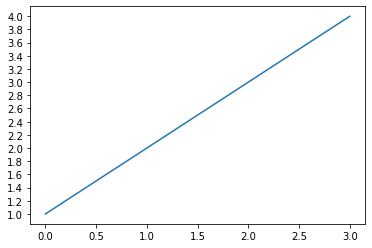

In [ ]:
showPlot([1,2,3,4])